In [3]:
import pandas as  pd
import numpy as np
import os 
# data load
data_path = '/Users/xingqiangchen/Desktop/2019-02-22/data/'
data_save_path = '/Users/xingqiangchen/Desktop/2019-02-22/data_check/'

if not os.path.exists(data_save_path):
        os.makedirs(data_save_path)

data_name = ['10.csv','56.csv','64.csv','72.csv','84.csv',
'11.csv','56_0.csv','64_0.csv','73.csv','85.csv',
'12.csv','57.csv','65.csv','74.csv','86.csv',
'40.csv','60.csv','66.csv','77.csv','87.csv',
'45.csv','60_0.csv','67.csv','78.csv','89.csv',
'50.csv','61.csv','68.csv','80.csv',
'51.csv','62.csv','69.csv','81.csv',
'52.csv','63.csv','70.csv','82.csv',
'55.csv','63_2.csv','71.csv','83.csv']

data = pd.DataFrame()
for name in data_name:
    data = pd.read_csv(data_path+name,index_col=None,low_memory=False)
    print("Dirving Car ID Set:",set(data.ID))
    data = data.reset_index().drop(['index'],axis=1)
    data.columns = ['Car_ID','Time','Car_Orientation','Pitch_Rate','Roll_Rate','Acceleration','Velocity','Steering_Wheel_Angle','Yaw_Rate']
    print(len(data[data.Time==0]))
    #data = data.drop_duplicates(['Time','Car_Orientation','Pitch_Rate','Roll_Rate','Acceleration'])
    #print(list(data[data.Time==0].index))
    sep_list = list(data[data.Time==0].index)
    
    if len(sep_list)==0 :
        sep_list=[0,len(data)]
        
    elif len(sep_list)>0 and sep_list[0]> 0 :
        if sep_list[-1]==len(data)-1:
            sep_list = [0]+sep_list+[len(data)+1]
        else:
            sep_list = [0]+sep_list+[len(data)]
        
    # print(sep_list)
    #print(data.info())
    
    print(' ####'*12+' CHECKING LIST !!! '+12*'#### ')

    
    file_name = name.strip('.csv')
    save_path = data_save_path+file_name+'/'
    print(save_path)
    
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    for i in range(1,len(sep_list)):
        
        seq = list(data.Time[sep_list[i-1]:sep_list[i]].astype(int))
        if len(seq)>151:
        
            flag = lessThan(seq)
            if flag:
                data.iloc[sep_list[i-1]:sep_list[i],:].to_csv(save_path+'OrderRight_'+name.strip('.csv')+'_'+str(i).zfill(4)+'.csv')
                print('save ok for {} '.format(i))
            
            if not flag :
                scp = detectSeqChange(seq)
                print('SCP:',scp)
                for i in range(1,len(scp)):
                    print(scp[i-1],scp[i])
                    if scp[i]>151:
                        print('SCP WORKING',scp) 
                        data.iloc[sep_list[i-1]+scp[i-1]:sep_list[i-1]+scp[i],:].to_csv(save_path+'OrderRight_'+name.strip('.csv')+'_'+str(i).zfill(4)+'_scpindex_'+str(sep_list[i-1]+scp[i])+'.csv')    
                    
                    else:
                        print('seq is less length at starting')
                        data.iloc[sep_list[i-1]+scp[i-1]:sep_list[i-1]+scp[i],:].to_csv(save_path+'LessLength_'+name.strip('.csv')+'_'+str(i).zfill(4)+'_scpindex_'+str(sep_list[i-1]+scp[i])+'.csv')
                        
        
                
        else:
            if lessThan(list(seq)):
                data.iloc[sep_list[i-1]:sep_list[i],:].to_csv(save_path+'LessLength'+name.strip('.csv')+'_'+str(i).zfill(4)+'.csv')
                print('LessLength!! {} '.format(i))
            else:
                error_list.append([sep_list[i-1],sep_list[i]])
                data.iloc[sep_list[i-1]:sep_list[i],:].to_csv(save_path+'LessLength_'+'OrderError_'+name.strip('.csv')+'_'+str(i).zfill(4)+'.csv')
                print('OrderError!! LessLength!! for {} '.format(i)*8)
            

Dirving Car ID Set: {10}
119
 #### #### #### #### #### #### #### #### #### #### #### #### CHECKING LIST !!! #### #### #### #### #### #### #### #### #### #### #### #### 
/Users/xingqiangchen/Desktop/2019-02-22/data_check/10/
save ok for 1 
LessLength!! 2 
save ok for 3 
save ok for 4 
save ok for 5 
save ok for 6 
save ok for 7 
save ok for 8 
SCP: [0, 5652, 7171]
0 5652
SCP WORKING [0, 5652, 7171]
5652 7171
SCP WORKING [0, 5652, 7171]
save ok for 10 
save ok for 11 
save ok for 12 
save ok for 13 
SCP: [0, 2898, 3668]
0 2898
SCP WORKING [0, 2898, 3668]
2898 3668
SCP WORKING [0, 2898, 3668]
save ok for 15 
save ok for 16 
save ok for 17 
save ok for 18 
save ok for 19 
save ok for 20 
save ok for 21 
save ok for 22 
save ok for 23 
save ok for 24 
save ok for 25 
SCP: [0, 880, 1507]
0 880
SCP WORKING [0, 880, 1507]
880 1507
SCP WORKING [0, 880, 1507]
save ok for 27 
save ok for 28 
save ok for 29 
save ok for 30 
save ok for 31 
save ok for 32 
save ok for 33 
SCP: [0, 1874, 9608]
0 187

In [65]:
def lessThan(seq):
    assert len(seq)>=2
    for index,value in enumerate(seq[:-1]):
        if value != seq[index+1]-100:
            
            return False
    return True


def detectSeqChange(seq):
    scp = []
    for index,value in enumerate(seq[:-1]):
        if value != seq[index+1]-100:
            scp.append(int(len(seq))-int(index))    
    return [0]+sorted(scp)+[len(seq)]


        `

In [66]:
data = pd.read_csv('/Users/xingqiangchen/Desktop/2019-02-22/data_check/61/OrderRight_61_0090.csv',index_col=None,low_memory=False).iloc[:,1:]
data = data.reset_index().drop(['index'],axis=1)
data.columns = ['Car_ID','Time','Car_Orientation','Pitch_Rate','Roll_Rate','Acceleration','Velocity','Steering_Wheel_Angle','Yaw_Rate']

In [67]:
from collections import Counter 
set(data.iloc[6484:6484+150,:].Acceleration)

{-0.1}

In [68]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7353 entries, 0 to 7352
Data columns (total 9 columns):
Car_ID                  7353 non-null int64
Time                    7353 non-null int64
Car_Orientation         7353 non-null float64
Pitch_Rate              7353 non-null float64
Roll_Rate               7353 non-null float64
Acceleration            7353 non-null float64
Velocity                7353 non-null float64
Steering_Wheel_Angle    7353 non-null float64
Yaw_Rate                7353 non-null float64
dtypes: float64(7), int64(2)
memory usage: 517.1 KB


In [69]:
from  rulsif import RULSIF
import numpy
def calculate_divergence_score(X_reference, X_test,settings):
    

    estimator = RULSIF(settings=settings)

    # Train the model
    estimator.train(X_reference, X_test)

    divergence_score = estimator.apply(X_reference, X_test)
    options = {'--debug':1}
    # estimator.show(displayName='try',options=options)
    
    return divergence_score


def condition_time_series( condition , before_Times , feature_name ):
    """

    :param condition:
    :param before_Times:
    :param feature_name:
    :return:
    """
    # before_Times = 3

    Times = sorted( list( set( condition.Time ) ) , reverse=False )
    con_all_day = condition[ [ 'Car_ID' , 'Time' , feature_name ] ].drop_duplicates( )

    df_test = con_all_day.pivot_table( index=[ 'Car_ID' ] , columns=[ 'Time' ] , values=[ feature_name ] )
    con_day_n = df_test[ feature_name ].sort_index( axis=1 , ascending=True ).reset_index( )

    Before_con_cols = [ 'before_' + feature_name + '_' + str( i ).zfill( 2 ) for i in range( before_Times ) ]


    before_data = pd.DataFrame( )

    for i in range( 1, len( Times[ 0:-(before_Times) ] )+1 ):
        before = con_day_n[ con_day_n.columns[ -(before_Times) - i: - i ] ]
        before.columns = Before_con_cols[ 0:before_Times ]
        before_title = con_day_n[ 'Car_ID' ]
        before_end = pd.concat( [ before_title , before ] , axis=1 )
        before_end.insert( 1 , 'Time' , Times[ -(before_Times) - i ] )

        ## drop duplicates
        before_end = before_end.drop_duplicates( )
        before_data = pd.concat( [ before_data , before_end ] , axis=0 )
    
    before_last = con_day_n[ con_day_n.columns[ -(before_Times) :]]
    before_last.columns =  Before_con_cols[ 0:before_Times ]
    
    before_last.insert( 0 , 'Car_ID' , before_data.iloc[1,0]  )
    before_last.insert( 1 , 'Time' , Times[ -(before_Times)  ] )
    
    before_data = before_data.append(before_last)
    
    before_data = before_data.sort_values(by=['Time'])
    before_data = before_data.reset_index( ).drop( 'index' , axis=1 )
    
    return before_data

ModuleNotFoundError: No module named 'rulsif'

## 2.1. Abrupt change detection
- ACD refers to algorithms that detect statistically significant changes in time series data. In this study, we used unconstrained least-squares importance fitting (uLSIF) method which has been known to detect changes more accurately than other detection methods (Liu, Yamada, Collier, & Sugiyama, 2013). uLSIF calculates a change point score using a density-ratio based dissimilarity measure from two consecutive time windows. The density-ratio based dissimilarity measure at time , is considered as the degree of difference between two consecutive time windows. It has a Pearson divergence (PE) form and is formulated as Eq. (1), in which all the variables can be learned from the data samples.

- As we use the data about speed, acceleration and yaw rate, the change point score increases whenever one or more density ratios of the three time-series data vary significantly. When the change point score exceeds the top 5th percentile, we detect this point as the change point. Once the change point is detected, we define the data of the corresponding time window (i.e., 15 s of speed, acceleration and yaw rate data) as a driving event.

  -  http://www.makotoyamada-ml.com/RuLSIF.html

  -  git@github.com:chenxingqiang/shift-detect.git

  -  git@github.com:chenxingqiang/densratio_py.git

[1]Aminikhanghahi S , Cook D J . A survey of methods for time series change point detection[J]. Knowledge and Information Systems, 2017, 51(2):339-367.

[2]Yamada M , Suzuki T , Kanamori T , et al. Relative Density-Ratio Estimation for Robust Distribution Comparison[J]. Neural Computation, 2013, 25(5):1324-1370.

[3]Jaakkola T S , Diekhans M , Haussler D . Using the Fisher Kernel Method to Detect Remote Protein Homologies.[C]// International Conference on Intelligent Systems for Molecular Biology. 1999.


In [80]:
def re(Hankel_Seq):
    result = []
    for i in range(0,len(Hankel_Seq.Time)-n):
        Y_ref  =  Hankel_Seq.iloc[i:i+n,2:].values
        print(Y_ref.shape)
        print('Ref Time Interval:',Hankel_Seq.iloc[i,1],Hankel_Seq.iloc[i+n-1,1])
        Y_tes  =  Hankel_Seq.iloc[i+1:i+n+1,2:].values
        print(Y_tes.shape)
        print('Test Time Interval:',Hankel_Seq.iloc[i+1,1],Hankel_Seq.iloc[i+n,1])

        divergence_score = calculate_divergence_score(Y_ref,Y_tes,settings)
        #divergence_score = 0
        print([Hankel_Seq.iloc[i+n,1]])
        result.append([Hankel_Seq.iloc[i+n,1],divergence_score])

    return  result  

In [81]:
# make Hankel Matrix
# sample length 150s  n = 1500
n = 15
# subsequence length 3s equals 30*100ms
k = 3
feature_name = 'Velocity'
settings={'--alpha':0.5,"--sigma":None,'--lambda':0.9,'--kernels':100,'--folds':10,'--debug':None}

# getting data 


before_Times = k

feature_names = ['Car_Orientation','Pitch_Rate','Roll_Rate','Acceleration','Velocity','Steering_Wheel_Angle','Yaw_Rate']

for feature_name in [feature_names[3]]:
    
    condition =  data[['Car_ID','Time',feature_name]]
    condition = condition.iloc[0:20,:]
    Hankel_Seq = condition_time_series( condition , before_Times , feature_name )

    result = re(Hankel_Seq)

    car_ID = str(Hankel_Seq.Car_ID[0])
    
    print(car_ID)

    #alpha = str(settings['--alpha'])
    #save_data = pd.DataFrame(result)

    #save_data.columns = ['Time','divergence_score']

    #save_data.to_csv(car_ID +'_'+feature_name+'_alpha='+alpha+'.csv')


(15, 3)
Ref Time Interval: 0 1400
(15, 3)
Test Time Interval: 100 1500
[1500]
(15, 3)
Ref Time Interval: 100 1500
(15, 3)
Test Time Interval: 200 1600
[1600]
(15, 3)
Ref Time Interval: 200 1600
(15, 3)
Test Time Interval: 300 1700
[1700]
56.0


In [82]:
print(result)

[[1500, 0.16357427532579949], [1600, 0.16252936870568013], [1700, 0.16519999120841855]]


In [62]:
path = '/Users/xingqiangchen/Desktop/2019-02-22/data_prod/OrderRight_10_0002_scpindex_7148/10_Yaw_Rate_alpha_0.5_lambda_1.5.csv'

data = pd.read_csv(path)

data = data.replace('NOT_FULLFILLMENT',0.0)

data['divergence_score']= data['divergence_score'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 3 columns):
Unnamed: 0          2078 non-null int64
Time                2078 non-null int64
divergence_score    2078 non-null float64
dtypes: float64(1), int64(2)
memory usage: 48.8 KB


In [63]:
save_data[['divergence_score']].plot()

NameError: name 'save_data' is not defined

In [64]:

## test 
from  rulsif import RULSIF
import numpy

settings={'--alpha':0.5,"--sigma":None,'--lambda':None,'--kernels':100,'--folds':5,'--debug':1}

estimator = RULSIF(settings=settings)


X_reference = numpy.array([[-327.538995,1060.88410,-5135.11159], \
                                     [-6079.76383,4540.07072, 4683.89186], \
                                     [-519.485848,-65.427245,-460.108594], \
                                     [4968.97172, 3051.50683,-102.050991], \
                                     [-5501.4825,-1951.72530,-44.1323003]])

X_test      = numpy.array([[4968.97172, 3051.50683,-102.050991], \
                                     [-5501.4825,-1951.72530,-44.1323003], \
                                     [2872.91368,-555.026187, 1582.54918], \
                                     [4968.97172, 3051.50683,-102.050991], \
                                     [-5501.4825,-1951.72530,-44.1323003]])

# Train the model
estimator.train(X_reference, X_test)

divergence_score = estimator.apply(X_reference, X_test)
options = {'--debug':1}
estimator.show(displayName='try',options=options)



ModuleNotFoundError: No module named 'rulsif'

    Time  divergence_score_acc
0  15000             -0.003594
1  15100             -0.003756
2  15200             -0.003813
3  15300             -0.003899
4  15400             -0.003930
    Time  divergence_score_vec
0  15000             -0.007701
1  15100             -0.007778
2  15200             -0.007949
3  15300             -0.007965
4  15400             -0.007873
    Time  divergence_score_yaw
0  15000             -0.006763
1  15100             -0.006137
2  15200             -0.005834
3  15300             -0.005338
4  15400             -0.004995
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247737 entries, 0 to 247736
Data columns (total 9 columns):
Car_ID                  247737 non-null int64
Time                    247737 non-null int64
Car_Orientation         247737 non-null float64
Pitch_Rate              247737 non-null float64
Roll_Rate               247737 non-null float64
Acceleration            247737 non-null float64
Velocity                247737 non-null float64


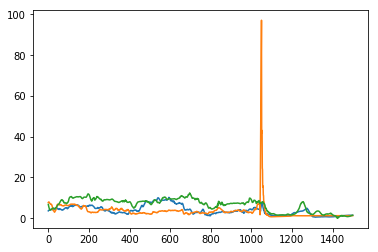

In [32]:
import pandas as pd 
%matplotlib inline
data_prod_path = 'data_prod/56/'
data_names = ['56_Acceleration_alpha=0.5.csv','56_Pitch_Rate_alpha=0.5.csv',
              '56_Steering_Wheel_Angle_alpha=0.5.csv','56_Yaw_Rate_alpha=0.5.csv',
              '56_Car_Orientation_alpha=0.5.csv','56_Roll_Rate_alpha=0.5.csv',
              '56_Velocity_alpha=0.5.csv']



data_acc = pd.read_csv(data_prod_path+ '56_Acceleration_alpha=0.5.csv')
data_acc = data_acc[data_acc.columns[1:]]
data_acc.columns = ['Time','divergence_score_acc']
print(data_acc.head())

data_acc['divergence_score_acc'] = data_acc['divergence_score_acc']*(-1000)
data_acc['divergence_score_acc'][0:1500].plot()

data_vec = pd.read_csv(data_prod_path+ '56_Velocity_alpha=0.5.csv')
data_vec = data_vec[data_vec.columns[1:]]
data_vec.columns = ['Time','divergence_score_vec']
print(data_vec.head())

data_vec['divergence_score_vec'] = data_vec['divergence_score_vec']*(-1000)
data_vec['divergence_score_vec'][0:1500].plot()

data_yaw = pd.read_csv(data_prod_path+ '56_Yaw_Rate_alpha=0.5.csv' )
data_yaw = data_yaw[data_yaw.columns[1:]]
data_yaw.columns = ['Time','divergence_score_yaw']
print(data_yaw.head())

data_yaw['divergence_score_yaw'] = data_yaw['divergence_score_yaw']*(-1000)
data_yaw['divergence_score_yaw'][0:1500].plot()




data = pd.read_csv('/Users/xingqiangchen/Desktop/2019-02-22/data/56.csv')

data = data.reset_index().drop(['index'],axis=1)
data.columns = ['Car_ID','Time','Car_Orientation','Pitch_Rate','Roll_Rate','Acceleration','Velocity','Steering_Wheel_Angle','Yaw_Rate']
data.head()

data['Time'] = data['Time'].astype(int)
data.info()

data_acc.info()
data_yaw.info()
data_vec.info()

data_ds_a  = pd.merge(data_acc,data_yaw,on=['Time'],how='left')

data_ds = pd.merge(data_ds_a,data_vec,on=['Time'],how='left')

data_re = pd.merge(data,data_ds,how='right',on=['Time'])

data_re = data_re.drop_duplicates(['divergence_score_acc','divergence_score_yaw','divergence_score_vec'])

data_re.info()


## standard of acd

data_re = data_re.reset_index().drop(['index'],axis=1)
data_re['ds_total'] = data_re['divergence_score_acc']+data_re['divergence_score_yaw']+data_re['divergence_score_vec']
data_re = data_re.sort_values(by=['ds_total'],ascending=False)

top5 = int(0.05*len(data_re))
print('Car 56 Top 5 is ',top5,len(data_re))

top5_ds  = data_re.iloc[top5,-2]
print('top5 divergence_score ',top5_ds)

data_re['is_acp'] = data_re['ds_total'].map(lambda x:1 if x>=top5_ds else 0)

data_re_a = data_re.sort_values(by=['Time'])
data_re_a = data_re_a.reset_index().drop(['index'],axis=1)

In [41]:
data_re_b = data_re_a[data_re_a.is_acp ==1]

events_index = [[int(x)-149, int(x)+1]for x in list(data_re_b.index)]

for event in events_index:
    event_df = data_re_a.iloc[event[0]:event[-1],0:9]
    event_df.to_csv('drive_event.csv')

In [42]:
events_index[-1]


[18177, 18327]

In [52]:
event_df = pd.DataFrame(events_index)
event_df.columns = ['start_index','end_index']

event_df.to_csv('drive_event.csv')


In [53]:
event_df

,start_index,end_index
0,-149,1
1,-148,2
2,-147,3
3,-146,4
4,-145,5
5,-144,6
6,-143,7
7,-142,8
8,-141,9
9,-140,10


In [5]:


# figure 1 data 
ds_yaw = data_re['divergence_score_yaw'][0:4000].values
ds_acc = data_re['divergence_score_acc'][0:4000].values
ds_vec = data_re['divergence_score_vec'][0:4000].values

t_yaw = data_re['Yaw_Rate'][0:4000].values
t_acc = data_re['Acceleration'][0:4000].values
t_vec = data_re['Velocity'][0:4000].values


## figure 1

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['YaHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #正常显示负号


t = np.arange(0, 4000, 1)

plt.subplot(3, 2, 1)
plt.plot(t, t_acc, '-', lw=0.6,color='blue')

plt.xlabel('time (ms)')
plt.ylabel('Acceleration')
plt.title('Car 56 Acceleration ')
plt.grid(False)
plt.subplot(3, 2, 2)
plt.plot(t, ds_acc, '-', lw=0.6,color='red')

plt.xlabel('time (ms)')
#plt.ylabel('Divergence Score')
plt.title('Divergence Score')
plt.grid(False)



plt.subplot(3, 2, 3)
plt.plot(t, t_vec, '-', lw=0.6,color='blue')
plt.title('Car 56 Speed')
plt.xlabel('time (ms)')
plt.ylabel('Speed')
plt.grid(False)

plt.subplot(3, 2, 4)
plt.plot(t, ds_vec, '-', lw=0.6,color='red')
plt.title('Divergence Score')
plt.xlabel('time (ms)')
#plt.ylabel('Divergence Score')
plt.grid(False)

plt.subplot(3, 2, 5)
plt.plot(t, t_yaw, '-', lw=0.6,color='blue')
plt.title('Car 56 Yaw Rate')

plt.xlabel('time (ms)')
plt.ylabel('Yaw Rate ')
plt.grid(False)
plt.subplot(3, 2, 6)
plt.plot(t, ds_yaw, '-', lw=0.6,color='red')
plt.title('Divergence Score')

plt.xlabel('time (ms)')
#plt.ylabel('Divergence Score')
plt.grid(False)


plt.tight_layout()
plt.savefig("figure_1.png", dpi=500)
plt.show()


Car 56 Top 5 is  916 18327
top5 divergence_score  30.0550732865


In [1]:
data_re_a.iloc[17400:17450]

NameError: name 'data_re_a' is not defined

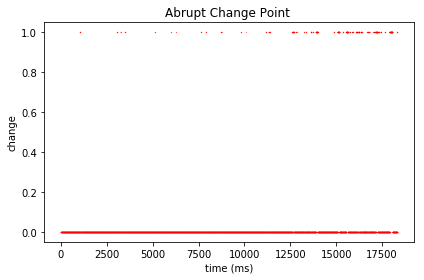

In [18]:
acp = data_re_a.is_acp.values[0:len(data_re_a)]

## figure 2

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, len(data_re_a), 1)

plt.subplot(1, 1, 1)
plt.plot(t, acp, 'r.',markersize=0.2)

plt.xlabel('time (ms)')
plt.ylabel('change')
plt.title('Abrupt Change Point ')
plt.grid(False)

plt.tight_layout()
plt.savefig("figure_2.png", dpi=500)
plt.show()


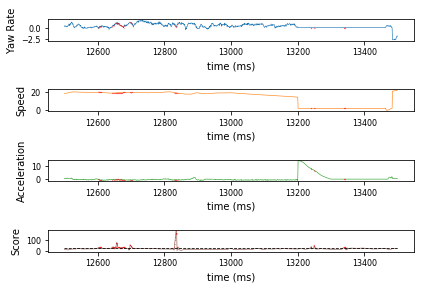

In [135]:
## figure 3
iv = [12500,13500]

data_acp = data_re_a.iloc[iv[0]:iv[1],:]
index_acp = data_acp[data_acp.is_acp==1].index.values
ds_yaw_acp = data_acp[data_acp.is_acp==1].divergence_score_yaw.values
ds_acc_acp = data_acp[data_acp.is_acp==1].divergence_score_acc.values
ds_vec_acp = data_acp[data_acp.is_acp==1].divergence_score_vec.values
ds_total_acp = data_acp[data_acp.is_acp==1].ds_total.values

t_yaw_acp = data_acp[data_acp.is_acp==1].Yaw_Rate.values
t_acc_acp = data_acp[data_acp.is_acp==1].Acceleration.values
t_vec_acp = data_acp[data_acp.is_acp==1].Velocity.values

ds_yaw = data_re_a['divergence_score_yaw'][iv[0]:iv[1]].values
ds_acc = data_re_a['divergence_score_acc'][iv[0]:iv[1]].values
ds_vec = data_re_a['divergence_score_vec'][iv[0]:iv[1]].values
ds_total = data_re_a['ds_total'][iv[0]:iv[1]].values

t_yaw = data_re_a['Yaw_Rate'][iv[0]:iv[1]].values
t_acc = data_re_a['Acceleration'][iv[0]:iv[1]].values
t_vec = data_re_a['Velocity'][iv[0]:iv[1]].values

index = data_re_a['index'][iv[0]:iv[1]].values

colors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf',
          '#1a55FF']

#colors = ['0.0',
#          '0.0',
#          '0.0',
#          '0.0',
#          '#9467bd',
#          '#8c564b',
#          '#e377c2',
#          '#7f7f7f',
#          '#bcbd22',
#          '#17becf',
#          '#1a55FF']

font2 = {'family': 'Times New Roman',
         'weight': 'bold',
         'size': 8,
         }

import numpy as np
import matplotlib.pyplot as plt

#t = np.arange(0, 4000, 1)

ax = plt.subplot(4, 1, 1)
plt.plot(index,t_yaw, '-', lw=0.6,color=colors[0])

point_x = index_acp
point_y = t_yaw_acp
plt.plot(point_x,point_y,'r.',markersize=0.2)
#ax.set_xticks(np.arange(iv[0],iv[1]))
plt.xlabel('time (ms)')
plt.ylabel('Yaw Rate')
plt.tick_params(labelsize=8)

#plt.title('Abrupt Change Point ')
plt.grid(False)

ax = plt.subplot(4, 1, 2)
plt.plot(index,t_vec, '-', lw=0.6,color=colors[1])

point_x = index_acp
point_y = t_vec_acp
plt.plot(point_x,point_y,'r.',markersize=0.2)
#ax.set_xticks(np.arange(iv[0],iv[1]))
plt.xlabel('time (ms)')
plt.ylabel('Speed')
#plt.title('Abrupt Change Point ')
plt.grid(False)
plt.tick_params(labelsize=8)

ax = plt.subplot(4, 1, 3)
plt.plot(index,t_acc, '-', lw=0.6,color=colors[2])

point_x = index_acp
point_y = t_acc_acp
plt.plot(point_x,point_y,'r.',markersize=0.2)
#ax.set_xticks(np.arange(iv[0],iv[1]))
plt.xlabel('time (ms)')
plt.ylabel('Acceleration')
#plt.title('Abrupt Change Point '3
plt.grid(False)
plt.tick_params(labelsize=8)


ax = plt.subplot(4, 1, 4)
plt.plot(index,ds_total, '-', lw=0.6,color=colors[5])

point_x = index_acp
point_y = ds_total_acp
plt.plot(point_x,point_y,'r.',markersize=0.3)
plt.plot(index,[top5_ds for i in range(len(index))],'k--',lw=0.8)

#ax.set_xticks(np.arange(iv[0],iv[1]))
plt.xlabel('time (ms)')
plt.ylabel('Score')
#plt.title('Total Divergence Score ')
plt.grid(False)
plt.tick_params(labelsize=8)

plt.tight_layout()
plt.savefig("figure_3_test_4.png", dpi=500)
plt.show()



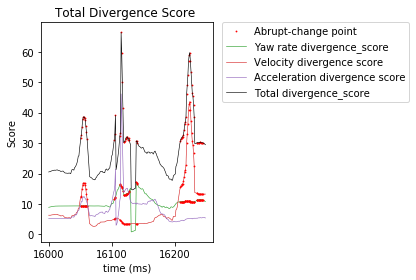

In [167]:
## figure 3
iv = [16000,16250]

data_acp = data_re_a.iloc[iv[0]:iv[1],:]
index_acp = data_acp[data_acp.is_acp==1].index.values
ds_yaw_acp = data_acp[data_acp.is_acp==1].divergence_score_yaw.values
ds_acc_acp = data_acp[data_acp.is_acp==1].divergence_score_acc.values
ds_vec_acp = data_acp[data_acp.is_acp==1].divergence_score_vec.values
ds_total_acp = data_acp[data_acp.is_acp==1].ds_total.values

t_yaw_acp = data_acp[data_acp.is_acp==1].Yaw_Rate.values
t_acc_acp = data_acp[data_acp.is_acp==1].Acceleration.values
t_vec_acp = data_acp[data_acp.is_acp==1].Velocity.values

ds_yaw = data_re_a['divergence_score_yaw'][iv[0]:iv[1]].values
ds_acc = data_re_a['divergence_score_acc'][iv[0]:iv[1]].values
ds_vec = data_re_a['divergence_score_vec'][iv[0]:iv[1]].values
ds_total = data_re_a['ds_total'][iv[0]:iv[1]].values

t_yaw = data_re_a['Yaw_Rate'][iv[0]:iv[1]].values
t_acc = data_re_a['Acceleration'][iv[0]:iv[1]].values
t_vec = data_re_a['Velocity'][iv[0]:iv[1]].values

index = data_re_a['index'][iv[0]:iv[1]].values

colors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf',
          '#1a55FF']

import numpy as np
import matplotlib.pyplot as plt

#t = np.arange(0, 4000, 1)

ax = plt.subplot(1, 1,1)
point_x = index_acp
point_y = ds_yaw_acp
plt.plot(point_x,point_y,'ro',markersize=0.8,label='Abrupt-change point')
plt.plot(index,ds_yaw, '-', lw=0.6,color=colors[2],label='Yaw rate divergence_score')

point_x = index_acp
point_y = ds_yaw_acp
plt.plot(point_x,point_y,'ro',markersize=0.8)
plt.plot(index,ds_vec, '-', lw=0.6,color=colors[3],label='Velocity divergence score')

point_x = index_acp
point_y = ds_vec_acp
plt.plot(point_x,point_y,'ro',markersize=0.8)
plt.plot(index,ds_acc, '-', lw=0.6,color=colors[4],label='Acceleration divergence score')

point_x = index_acp
point_y = ds_total_acp
plt.plot(point_x,point_y,'ro',markersize=0.8)
plt.plot(index,ds_total, '-', lw=0.6,color='k',label='Total divergence_score')


#ax.set_xticks(np.arange(iv[0],iv[1]))
plt.xlabel('time (ms)')
plt.ylabel('Score')
plt.title('Total Divergence Score ')




plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.grid(False)
plt.tight_layout()
plt.savefig("figure_4_test.png", dpi=500)
plt.show()


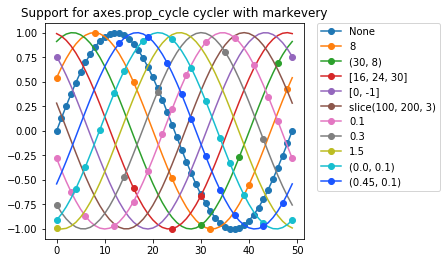

In [270]:
from cycler import cycler
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Define a list of markevery cases and color cases to plot
cases = [None,
         8,
         (30, 8),
         [16, 24, 30],
         [0, -1],
         slice(100, 200, 3),
         0.1,
         0.3,
         1.5,
         (0.0, 0.1),
         (0.45, 0.1)]



# Configure rcParams axes.prop_cycle to simultaneously cycle cases and colors.
mpl.rcParams['axes.prop_cycle'] = cycler(markevery=cases, color=colors)

# Create data points and offsets
x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2 * np.pi, 11, endpoint=False)
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# Set the plot curve with markers and a title
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

for i in range(len(cases)):
    ax.plot(yy[:, i], marker='o', label=str(cases[i]))
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Support for axes.prop_cycle cycler with markevery')

plt.show()


## 2.2. Sparse auto-encoder
- Feature extraction process for the driving event is needed before clustering. Clustering is a method of grouping a set of data by collecting similar data for one group and separating the different data into other groups. As the raw driving records used as input to clustering are mostly large-scale, there are many data points only with subtle differences, which makes clustering difficult. In order to derive informative and interpretable clusters, therefore, those similar input data need to be regenerated into a generalized form; the results of this process are called features. In general, simple statistical values such as maximum, minimum, average and variance are used for feature values. However, these simple statistical values are not representative in many cases for capturing the features from time-series data. Thus, a sparse auto-encoder, a kind of neural network algorithm, is used for feature extraction in this study because it can provide a more generalized value and thereby extract new features that potentially outperform simple statistical values (Längkvist, Karlsson, & Loutfi, 2014).

- The basic auto-encoder employs the specific concept of a neural network, in which output data replicate input data; this device consists of an encoder and a decoder, as shown in Fig. 1. The encoder is an abstraction process that makes input data belong to features; the decoder is an actualization process that causes features to reconstitute the original input data. The sparse auto-encoder is a version of a basic auto-encoder modified by adding a sparse term that enables the auto-encoder to extract more abstracted and generalized features.

- In the input and output data, X and Z, the same set of in-vehicle sensor data recording speed, acceleration and yaw rate during event time periods were entered. The hidden representation, E, is determined by the encoder through a training process. This hidden representation includes values of driving record data abstracted during the events that were identified using ACD. Therefore, hidden representation is considered as a feature of the driving event and, using this, we are able to construct clusters using two-level clustering.

[3] Martin Längkvist, Karlsson L , Loutfi A . A Review of Unsupervised Feature Learning and Deep Learning for Time-Series Modeling[J]. Pattern Recognition Letters, 2014, 42(1):11-24.
 
- git@github.com:chenxingqiang/AE_ts.git

### References

[1] N. Gianniotis, S. D. Kugler, P. Tino, K. L. Polsterer, "Model-coupled autoencoder for time series visualisation". Neurocomputing, vol. 192, pp. 139-146, Jun 2016.

[2] A. Rodan, P. Tino, "Minimum complexity echo state network". IEEE T. Neural Netw. 22, 131–144 (2011).

[3] Python ESN. https://github.com/siloekse/PythonESN

[4] https://github.com/kazu-riemann/visualization_by_echo_state_network.git

## 2.3. Two-level clustering
- The two-level clustering algorithm was used to classify the driving patterns. This is a sequential combination of two clustering algorithms: Self-organizing map (SOM) and K-means clustering. The first-level is SOM that distributes N inputs into M neurons with data similarity. The second-level is K-means clustering, which organizes M neurons into K number of clusters. This procedure reduces the dimensionality of the initial driving events from N to K, where N > M > K. Fig. 2 illustrates the concept of the two-level clustering algorithm. The benefits of using this algorithm are that it can reduce computational costs, and that it has noise robustness (Vesanto and Althniemi, 2000).